<p>Name: TAY SOK KEM</p>
<p>Course: TIPP AAI Intake 1 by Republic Polytechnic</p>
<p>Module: Python for Data Science</p>
<p>Submission deadline: 31 Jan 2020 23:59</p>

Download completed.
Converting photos to greyscale...
flickr/convert/c_27326351080_7cb64a7665_m.jpg
flickr/convert/c_27653319031_d64f8beeb8_n.jpg
flickr/convert/c_22215721055_d1c200de4c_n.jpg
flickr/convert/c_29070234646_d4bc538846_m.jpg
flickr/convert/c_23251917722_610ba16322_m.jpg
flickr/convert/c_28776222960_6d3800c57d_n.jpg
flickr/convert/c_29359326241_5ed224227d_m.jpg
flickr/convert/c_12337695235_664b7e1328_m.jpg
flickr/convert/c_6650348617_def99f0fe4_m.jpg
flickr/convert/c_8432503596_67a5264f7f_m.jpg
flickr/convert/c_29732466743_55d4399401_m.jpg
flickr/convert/c_28168408525_4f50b90a98_m.jpg
flickr/convert/c_15629040035_2077f86aab_m.jpg
flickr/convert/c_14095127199_f0f51c5afc_m.jpg
flickr/convert/c_8310392852_c55d8aa5a1_m.jpg
flickr/convert/c_44645439685_1d848a7eef_n.jpg
flickr/convert/c_23313968663_2080190e0d_m.jpg
flickr/convert/c_6219236142_33dafe8f22_m.jpg
flickr/convert/c_27534225480_1eec92d5ed_m.jpg
flickr/convert/c_28069344081_ecabe992a0_m.jpg
flickr/convert/c_30981230751_9

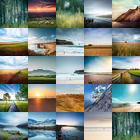

flickr/grid/grid.jpg
Creation of photo grids completed.
Applying image filter <class 'PIL.ImageFilter.CONTOUR'> ...
flickr/fitler/CONTOUR_27326351080_7cb64a7665_m.jpg
flickr/fitler/CONTOUR_27653319031_d64f8beeb8_n.jpg
flickr/fitler/CONTOUR_22215721055_d1c200de4c_n.jpg
flickr/fitler/CONTOUR_29070234646_d4bc538846_m.jpg
flickr/fitler/CONTOUR_23251917722_610ba16322_m.jpg
flickr/fitler/CONTOUR_28776222960_6d3800c57d_n.jpg
flickr/fitler/CONTOUR_29359326241_5ed224227d_m.jpg
flickr/fitler/CONTOUR_12337695235_664b7e1328_m.jpg
flickr/fitler/CONTOUR_6650348617_def99f0fe4_m.jpg
flickr/fitler/CONTOUR_8432503596_67a5264f7f_m.jpg
flickr/fitler/CONTOUR_29732466743_55d4399401_m.jpg
flickr/fitler/CONTOUR_28168408525_4f50b90a98_m.jpg
flickr/fitler/CONTOUR_15629040035_2077f86aab_m.jpg
flickr/fitler/CONTOUR_14095127199_f0f51c5afc_m.jpg
flickr/fitler/CONTOUR_8310392852_c55d8aa5a1_m.jpg
flickr/fitler/CONTOUR_44645439685_1d848a7eef_n.jpg
flickr/fitler/CONTOUR_23313968663_2080190e0d_m.jpg
flickr/fitler/CONTOU

In [42]:
# Question 7): Download photos from a website and manipulate them
import requests, os, bs4, re
import urllib.request
from PIL import Image, ImageFilter

def downloadPhoto(url, pDir):
    print('Downloading photos from %s...' % url)
    resp = requests.get(url)
    resp.raise_for_status()

    soup = bs4.BeautifulSoup(resp.text, 'html.parser')
    #print(soup)
    divElem = soup.find_all('div', class_='view photo-list-photo-view requiredToShowOnServer awake')  #<div> based on flickr web page
    if divElem == []:
        print('No photos found.')
    else:
        photos = []
        for n in range(len(divElem)):
            #print(divElem[n].text)
            #start: flickr div style
            style = divElem[n].get('style') 
            photoUrl = "https:" + re.search('url\((.+?)\)', style).group(1)  #extract the photo URL from "style" attribute
            # end: flickr div style
        
            photoName = pDir + '/' + os.path.basename(photoUrl)  #save the photo in the directory
            #print(photoUrl, photoName)
            print('Downloading photo %s...' % (photoUrl))
            urllib.request.urlretrieve(photoUrl, photoName)
            photos.append(photoName)
    print('Download completed.')
    
    return photos

def convertPhoto(attr, cDir):
    print('Converting photos to %s...' % attr)
    if attr == 'greyscale':
        mode = 'L' 
    for photo in photos:
        img = Image.open(photo).convert(mode)
        #img.show()
        #display(img)
        photoName = cDir + '/c_' + os.path.basename(photo)
        print(photoName)
        img.save(photoName, 'jpeg')
        
    print('Conversion of photos completed.')

def resizePhoto(w, h, rDir):
    print('Resizing photos to %s (width) x %s (height) pixels...' %(w, h)) 
    for photo in photos:
        img = Image.open(photo).resize((w, h), Image.LANCZOS)
        #img.show()
        #display(img)
        photoName = rDir + '/r_' + os.path.basename(photo)
        print(photoName)
        img.save(photoName, 'jpeg')
        
    print('Resize of photos completed.')
    
def gridPhoto(w, h, fromDir, gDir):
    print('Creating photos grid of size %s (width) x %s (height) pixels...' %(w, h))
    imgs = []
    #to open image files from resize directory
    for root, dirs, files in os.walk(fromDir): 
        for file in files:
            imgFile = fromDir + '/' + file
            imgs.append(Image.open(imgFile))   
            
    gImg = Image.new('RGB', (140, 140))  #create a new image with size 5x28
    for x in range(0, 5):
        for y in range(0, 5):
            z = (w*x + y) % len(imgs)  #select images to form the grid recursively
            gImg.paste(imgs[z], (28 * x, 28 * y))
            #display(gImg)
    #gImg.show()
    display(gImg)
    photoName = gDir + '/grid.jpg'
    print(photoName)
    gImg.save(photoName, 'jpeg')
    
    print('Creation of photo grids completed.')

def applyFilter(imgFil, fDir):
    fil = re.search('ImageFilter\.(.+?)\'>', str(imgFil)).group(1)  #extract the filter name
    print('Applying image filter %s ...' %(imgFil)) 
    for photo in photos:
        img = Image.open(photo).filter(imgFil)
        #img.show()
        #display(img)
        photoName = fDir + '/' + fil + '_' + os.path.basename(photo)
        print(photoName)
        img.save(photoName, 'jpeg')
            
    print('Image filter', fil, 'applied.')
    
#download photos from the url
pDir='flickr'
url = 'https://flickr.com/search/?text=landscape'   #the url to download the photos from
os.makedirs(pDir, exist_ok=True)   #create the directory to store the photos

photos = downloadPhoto(url, pDir)

#1) to convert the images to greyscale and save them into a separate directory
cDir = pDir+'/convert'
os.makedirs(cDir, exist_ok=True)   #create a separate directory to store the converted photos
convertPhoto('greyscale', cDir)

#2) to resize the images to 28px by 28px and save them into a separate directory
rDir = pDir+'/resize'
os.makedirs(rDir, exist_ok=True)   #create a separate directory to store the resized photos
resizePhoto(28, 28, rDir)

#3) to create images of 5x5 photo grids, with the 28px by 28px, 
gDir = pDir+'/grid'
os.makedirs(gDir, exist_ok=True)   #create a separate directory to store the photo grid
gridPhoto(5, 5, rDir, gDir)

#4) Randomly, apply filters (e.g. blur, rotation) on the original images and save
fDir = pDir+'/fitler'
os.makedirs(fDir, exist_ok=True)   #create a separate directory to store the filtered photo
try:
    #ImageFilter = ['BLUR', 'CONTOUR', 'DETAIL', 'EDGE_ENHANCE', 'EDGE_ENHANCE_MORE', 'EMBOSS', 'FIND_EDGES', 'SMOOTH', 'SMOOTH_MORE', 'SHARPEN']
    applyFilter(ImageFilter.CONTOUR, fDir)
except Exception as e:
    print("Error:", e)
